In [3]:
options(width=75)
library(glue)
library(tidyverse)
library(quanteda)

── Attaching packages ────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ───────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()

Package version: 1.5.2

Parallel computing: 2 of 8 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [2]:
library(quanteda)
texts = c("The caged bird sings with a fearful trill", 
          "for the caged bird sings of freedom")
d = dfm(texts)
# Inspect by converting to a (dense) matrix
convert(d, "matrix") 

Package version: 1.5.2

Parallel computing: 2 of 8 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




,the,caged,bird,sings,with,a,fearful,trill,for,of,freedom
text1,1,1,1,1,1,1,1,1,0,0,0
text2,1,1,1,1,0,0,0,0,1,1,1


In [4]:
text = "I haven't seen John's derring-do"
tokens(text)

Tokens consisting of 1 document.
text1 :
[1] "I"          "haven't"    "seen"       "John's"     "derring-do"


In [5]:
haiku = "\u53e4\u6c60\u86d9\u98db\u3073\u8fbc\u3080\u6c34\u306e\u97f3"
tokens(haiku)

Tokens consisting of 1 document.
text1 :
[1] "古池"     "蛙"       "飛び込む" "水"       "の"       "音"      


In [3]:
library(tidyverse)
sotu = read_csv("http://cssbook.net/d/sotu.csv")
d = dfm(sotu$text)
d

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  FirstName = col_character(),
  President = col_character(),
  Date = col_date(format = ""),
  delivery = col_character(),
  type = col_character(),
  party = col_character(),
  text = col_character()
)



Document-feature matrix of: 85 documents, 17,999 features (91.0% sparse).

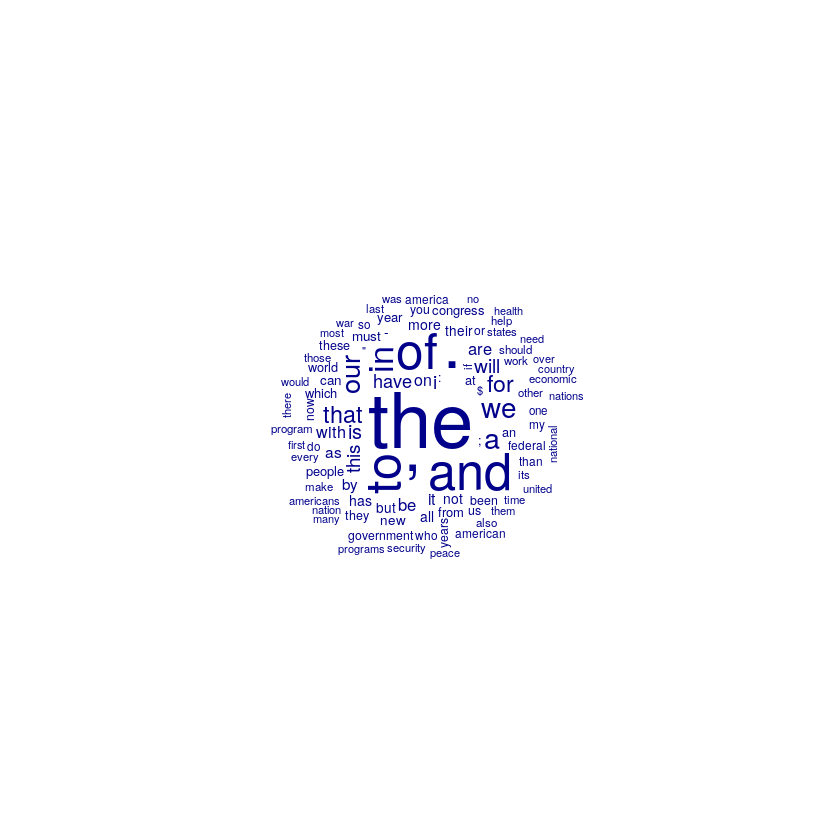

In [7]:
textplot_wordcloud(d, max_words=100)

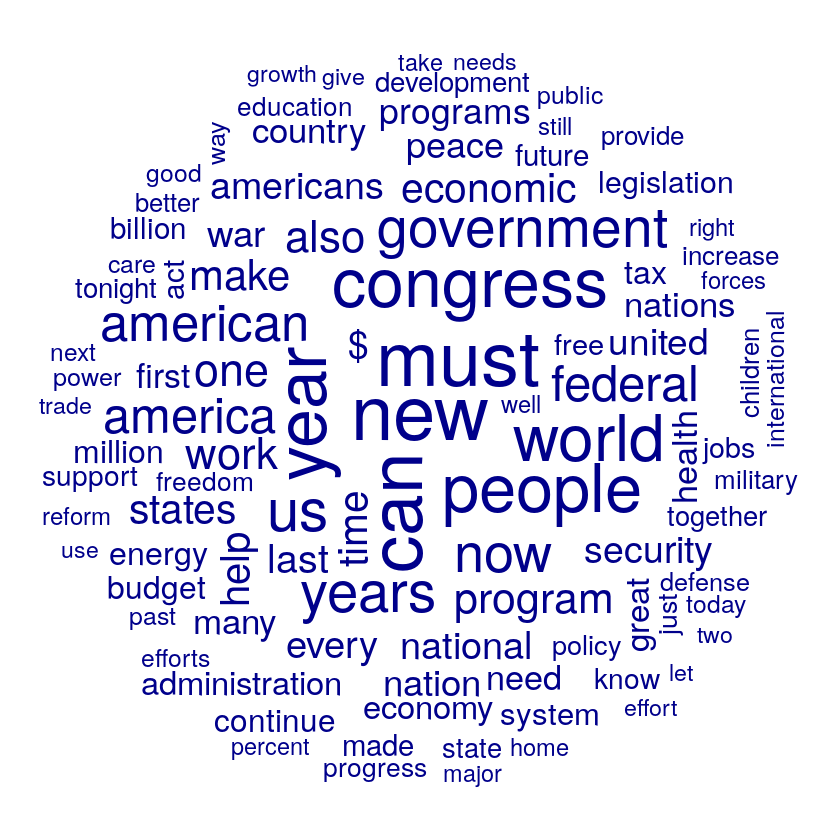

In [8]:
d2 = dfm(sotu$text, remove=stopwords('english'), remove_punct=TRUE)
textplot_wordcloud(d2, max_words=100)

In [12]:
library(stopwords)
my_stop_words = c(stopwords('english'), "can", "new", "us")
glue("Total {length(my_stop_words)} words: {paste(head(my_stop_words), collapse=',')}...")
d2 = dfm(sotu$text, remove=my_stop_words, remove_punct=TRUE)


Total 178 words: i,me,my,myself,we,our...

In [5]:
url = "http://cssbook.net/d/trumptweets.csv"
tweets = read_csv(url, col_types=cols_only(text='c', status_id='c')) 
dfm_tweets = tweets %>% corpus(docid_field="status_id") %>% dfm(remove=stopwords('english'), remove_punct=TRUE)
textstat_frequency(dfm_tweets) %>% head()

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
1,@realdonaldtrump,8526,1,8458,all
2,t.co,8498,2,7659,all
3,http,4540,3,4419,all
4,trump,4416,4,4205,all
5,great,4312,5,4053,all
6,https,4190,6,3444,all


In [1]:
str_ texts(tweets)
tweets %>% filter(status237) %>% tokens()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: str_ texts
         ^


In [ ]:
import re

re.sub("https?://\\S*", 